# **Kelompok 4**

1. Yehezkiel Stephanus Austin (215150207111053)
2. Haikal Irfano (215150207111043)
3. Juan Christopher Young (215150201111027)
4. M Farrel Rabiultsani U A (215150207111050)
5. Difa Nurramadhani Firman (215150200111049)
6. Afwan Mulia Pratama (215150201111059)

# **Import Dependencies**

In [19]:
# !pip install minisom

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from minisom import MiniSom  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


# Dataset
```
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/code?datasetId=42674
```

In [2]:
data_directory = "dataset\Mall_Customers.csv"
df = pd.read_csv(data_directory)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Data Understanding**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Missing Values Check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
#  Duplicate Values Check
df.duplicated().sum()

0

In [25]:
gender = df['Gender']
age = df['Age']
annual_income = df['Annual Income (k$)']
spending_score = df['Spending Score (1-100)']

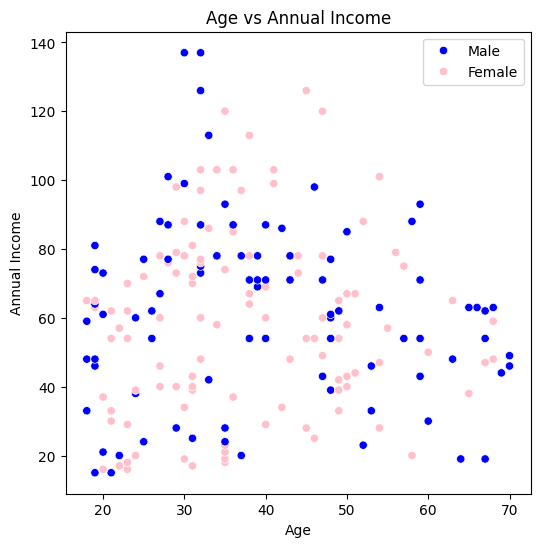

In [26]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x=age, y=annual_income, hue=gender, palette={'Male': 'blue', 'Female': 'pink'})
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

Age vs Annual Income: High-earners age are in 30's and 40's.

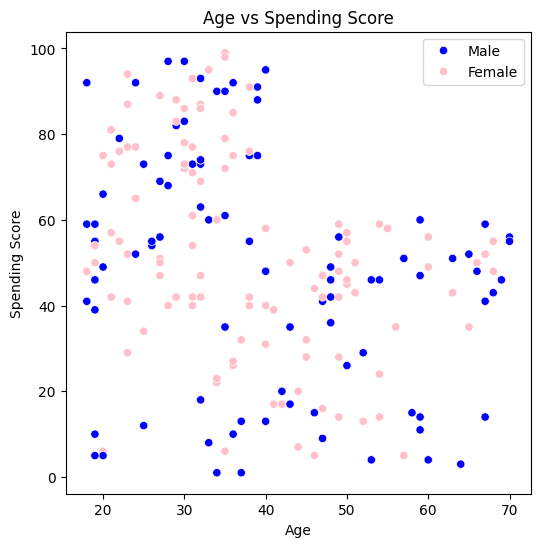

In [27]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x=age, y=spending_score, hue=gender, palette={'Male': 'blue', 'Female': 'pink'})
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Age vs Spending Score: Adults under 40 have the highest shopping scores.

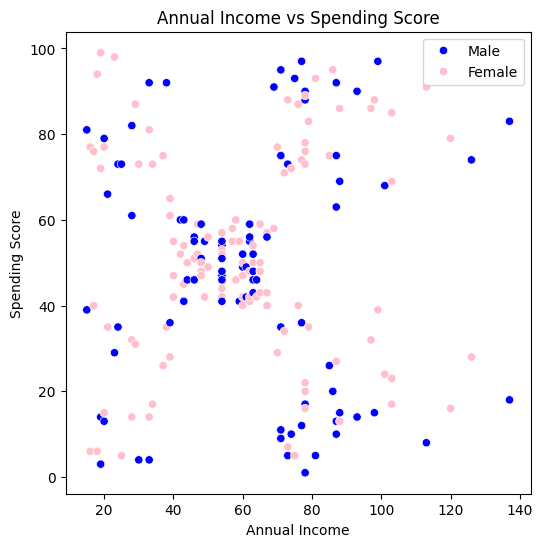

In [28]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x=annual_income, y=spending_score, hue=gender, palette={'Male': 'blue', 'Female': 'pink'})
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Annual Income vs Spending Score: Visually there are five strong cluster

# **Data Preprocessing**

In [6]:
# Take only Annual Income and Spending Score
data = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
# Normalization
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns= ['Annual Income', 'Spending Score'])
scaled_data.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [8]:
scaled_data_values = scaled_data.values

# **Modeling**

## Find best number of neuron with silhouette score

Text(0, 0.5, 'Silhouette scores')

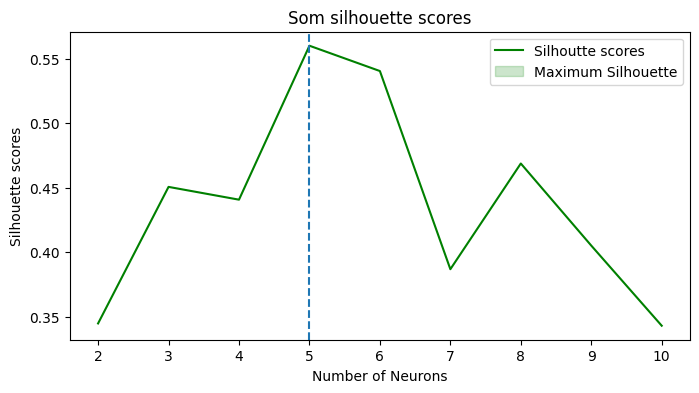

In [143]:
n_neurons = list(range(2, 11))
silhouette_scores = []

for n_neuron in n_neurons:
    # Initialization and training
    som_shape = (1, n_neuron)
    som = MiniSom(som_shape[0], som_shape[1], scaled_data_values.shape[1], sigma=0.5, learning_rate=0.1)
    som.random_weights_init(scaled_data_values)
    som.train(scaled_data_values, 500, verbose=False)
    # Each neuron represents a cluster
    winner_coordinates = np.array([som.winner(x) for x in scaled_data_values]).T
    # With np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
    cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
    silhouette_scores.append(silhouette_score(scaled_data_values, cluster_index))

plt.figure(figsize=(8, 4))
sns.lineplot(x=n_neurons, y=silhouette_scores,color='g').set(title='Som silhouette scores')
Y=max(silhouette_scores)
X=silhouette_scores.index(Y)+2
plt.axvline(X, 0, Y+1, linestyle='dashed',)
plt.legend(['Silhoutte scores','Maximum Silhouette'])
plt.xlabel('Number of Neurons')
plt.ylabel('Silhouette scores')


## Training

In [3]:
# Som Shape
neurons = 5
som_shape = (1, neurons)

In [9]:
# Minisom (x, y, data row, sigma, learning rate, decay_function=asymptotic_decay, neighborhood_function='gaussian', activation_distance='euclidean')
# x, y = som shape
# Sigma = radius of the different neighbors
# Learning rate = how much the weights are updated during each iteration
# Decay Function (Asymtophic decay) = learning_rate / (1+t/(max_iter/2))
# Neighborhood function = function that weights the neighbors of the BMU
# Activation distance = distance function between the weights and the input vector
som = MiniSom(som_shape[0], som_shape[1], scaled_data_values.shape[1], sigma=0.5, learning_rate=0.1)

Weights before training
(1, 5, 2)
[[[0.26229508 0.52040816]
  [0.28688525 0.48979592]
  [0.51639344 0.90816327]
  [0.1147541  0.30612245]
  [0.31967213 0.40816327]]]


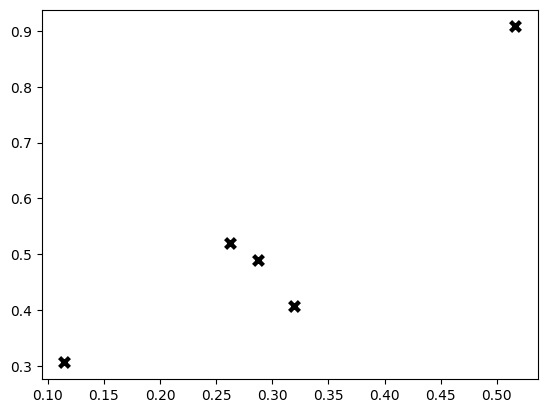

In [17]:
# Weight Initialization
som.random_weights_init(scaled_data_values)

innitial_weights = som.get_weights()
print("Weights before training")
print(innitial_weights.shape)
print(innitial_weights)

for centroid in innitial_weights:
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=5, linewidths=10, color='k', label='centroid')

In [18]:
# Train
som.train(scaled_data_values, 1000)

Weights after training
(1, 5, 2)
[[[0.12043385 0.76645805]
  [0.39610178 0.46467044]
  [0.6353337  0.8259503 ]
  [0.11113399 0.21086446]
  [0.6517252  0.16238003]]] 

Silhouette Score: 0.547866216175858


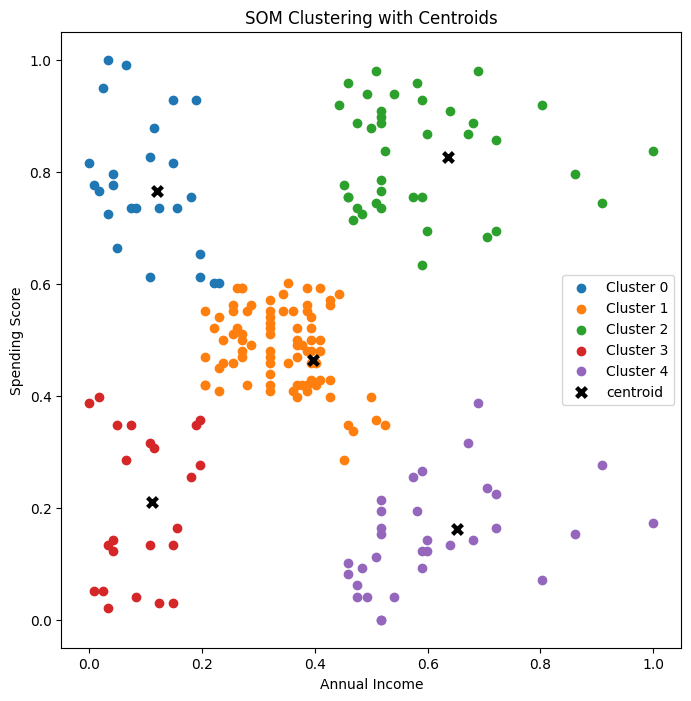

Number of data points in each neuron: [[25. 81. 39. 23. 32.]]
Quantization Error: 0.12942769503537302
Topographic Error: 0.52


In [19]:
final_weights = som.get_weights()
print("Weights after training")
print(final_weights.shape)
print(final_weights, '\n')

# Each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in scaled_data_values]).T
# Convert the bidimensional coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
# Shilhouette Score
silhouette_avg = silhouette_score(scaled_data_values, cluster_index)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters and their centroids
plt.figure(figsize=(8, 8))
# Cluster Data
for c in np.unique(cluster_index):
    plt.scatter(scaled_data_values[cluster_index == c, 0], scaled_data_values[cluster_index == c, 1], label='Cluster '+str(c))
# Cluster Centroids
for centroid in final_weights:
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', s=5, linewidths=10, color='k', label='centroid')
plt.title('SOM Clustering with Centroids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Print 
print("Number of data points in each neuron:", som.activation_response(scaled_data_values))
print("Quantization Error:", som.quantization_error(scaled_data_values))
print("Topographic Error:", som.topographic_error(scaled_data_values))

In [20]:
# Euclidean Distance 
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Manually compute the distances between each data point and each neuron
distances = np.zeros((scaled_data_values.shape[0],final_weights.shape[1]))
for i in range(scaled_data_values.shape[0]):
    for j in range(final_weights.shape[1]):
        distances[i, j] = euclidean_distance(scaled_data_values[i, 0], scaled_data_values[i, 1], final_weights[:, j, 0], final_weights[:, j, 1])

# Final dataframe
final_data = scaled_data.copy()

# Add distance columns for each neuron
for i in range(distances.shape[1]):  
    final_data[f'Distance {i}'] = distances[:, i]
    
# Assign cluster index directly to the 'Cluster' column
final_data['Cluster'] = cluster_index

final_data

,Annual Income,Spending Score,Distance 0,Distance 1,Distance 2,Distance 3,Distance 4,Cluster
0,0.000000,0.387755,0.397392,0.403500,0.771793,0.208904,0.689594,3
1,0.000000,0.816327,0.130350,0.529678,0.635407,0.615577,0.923251,0
2,0.008197,0.051020,0.724188,0.567077,0.996904,0.190122,0.653093,3
3,0.008197,0.775510,0.112602,0.497083,0.629162,0.573952,0.888852,0
4,0.016393,0.397959,0.382904,0.385524,0.752505,0.209715,0.677602,3
...,...,...,...,...,...,...,...,...
195,0.860656,0.795918,0.740808,0.570557,0.227315,0.950826,0.667100,2
196,0.909836,0.275510,0.929616,0.547453,0.615090,0.801314,0.281815,4
197,0.909836,0.744898,0.789697,0.585193,0.286219,0.960790,0.637141,2
198,1.000000,0.173469,1.060788,0.670441,0.747471,0.889652,0.348451,4


In [21]:
# Check cluster num
for i in range (neurons):
    print("Cluster", i, ":", final_data[final_data['Cluster'] == i].shape[0], "data points")

Cluster 0 : 25 data points
Cluster 1 : 81 data points
Cluster 2 : 39 data points
Cluster 3 : 23 data points
Cluster 4 : 32 data points
